# Black Friday Sales Prediction

## Problem Statement:-
A retail company “ABC Private Limited” wants to understand the customer purchase behavior (specifically, purchase amount) against various products of different categories. They have shared purchase summaries of various customers for selected high volume products from last month.
Build a model to predict the purchase amount of customers against various products which will help them to create personalized offers for customers against different products.


Importing necessery Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Import training file i.e. train.csv

In [2]:
df = pd.read_csv(r'train.csv')
df_copy = df.copy()
df.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [3]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [4]:
df.shape

(550068, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.Purchase.value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

# Exploratory Data Analysis(EDA)

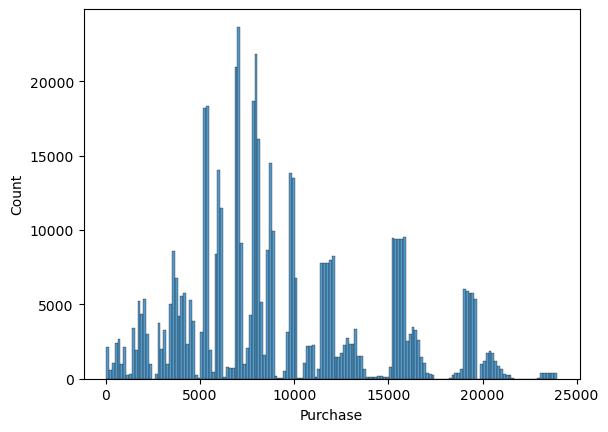

In [7]:
sns.histplot(x='Purchase', data=df, )
plt.show()

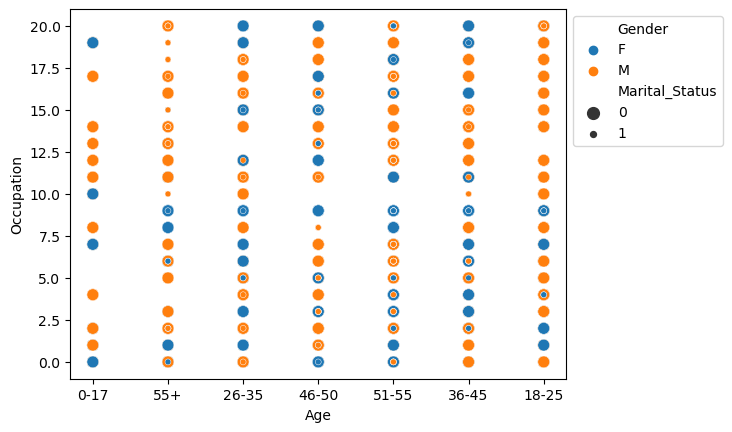

In [8]:
sns.scatterplot( x="Age", y='Occupation', data=df,
                hue='Gender', size='Marital_Status')
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

In [9]:
#sns.pairplot(df, hue='Gender', height=2)

<AxesSubplot:xlabel='Purchase'>

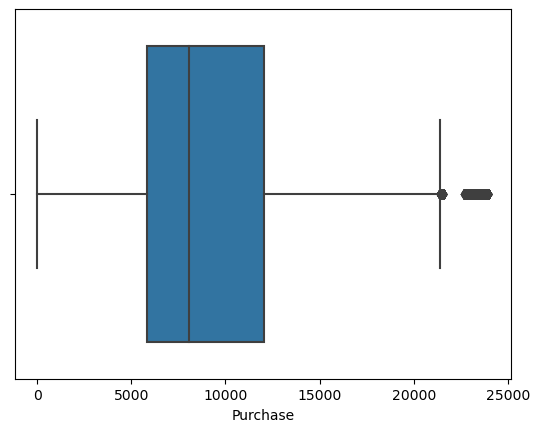

In [10]:
sns.boxplot(x='Purchase',data=df)

                     User_ID  Occupation  Marital_Status  Product_Category_1  \
User_ID             1.000000   -0.023971        0.020443            0.003825   
Occupation         -0.023971    1.000000        0.024280           -0.007618   
Marital_Status      0.020443    0.024280        1.000000            0.019888   
Product_Category_1  0.003825   -0.007618        0.019888            1.000000   
Product_Category_2  0.001529   -0.000384        0.015138            0.540583   
Product_Category_3  0.003419    0.013263        0.019473            0.229678   
Purchase            0.004716    0.020833       -0.000463           -0.343703   

                    Product_Category_2  Product_Category_3  Purchase  
User_ID                       0.001529            0.003419  0.004716  
Occupation                   -0.000384            0.013263  0.020833  
Marital_Status                0.015138            0.019473 -0.000463  
Product_Category_1            0.540583            0.229678 -0.343703  
Prod

<AxesSubplot:>

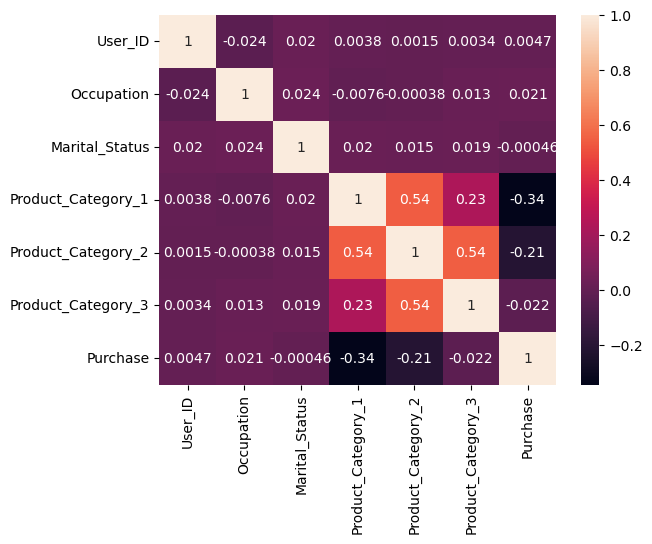

In [11]:
print(df.corr())
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

In [12]:
df.isnull().mean()*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [13]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mean(),inplace=True)
df['Product_Category_3'].fillna(df['Product_Category_3'].mean(),inplace=True)

In [14]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Stay_In_Current_City_Years'] = le.fit_transform(df['Stay_In_Current_City_Years'])

df['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0])

([<matplotlib.patches.Wedge at 0x21f6a691310>,
 [Text(0.4921146236045687, 0.983780055314466, '2'),
  Text(-1.0347973749789408, 0.37308764752628026, '4'),
  Text(-0.7821676107334653, -0.7734428412749725, '3'),
  Text(0.2583588870847174, -1.0692290145073442, '1'),
  Text(1.002184351502242, -0.4534606108627638, '0')])

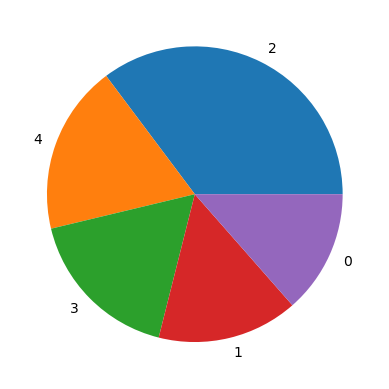

In [16]:
plt.pie(df['Stay_In_Current_City_Years'].value_counts(), labels = df['Stay_In_Current_City_Years'].unique())

In [17]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [18]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Age'] = le.fit_transform(df['Age'])
df['City_Category'] = le.fit_transform(df['City_Category'])
df['Product_Category_2'] = le.fit_transform(df['Product_Category_2'])
df['Product_Category_3'] = le.fit_transform(df['Product_Category_3'])
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,8,9,8370
1,1000001,P00248942,0,0,10,0,2,0,1,4,11,15200
2,1000001,P00087842,0,0,10,0,2,0,12,8,9,1422
3,1000001,P00085442,0,0,10,0,2,0,12,13,9,1057
4,1000002,P00285442,1,6,16,2,4,0,8,8,9,7969
5,1000003,P00193542,1,2,15,0,3,0,1,0,9,15227
6,1000004,P00184942,1,4,7,1,2,1,1,6,14,19215
7,1000004,P00346142,1,4,7,1,2,1,1,14,9,15854
8,1000004,P0097242,1,4,7,1,2,1,1,15,9,15686
9,1000005,P00274942,1,2,20,0,1,1,8,8,9,7871


                             User_ID    Gender       Age  Occupation  \
User_ID                     1.000000 -0.033474  0.032698   -0.023971   
Gender                     -0.033474  1.000000 -0.004262    0.117291   
Age                         0.032698 -0.004262  1.000000    0.091463   
Occupation                 -0.023971  0.117291  0.091463    1.000000   
City_Category               0.022859 -0.004515  0.123079    0.034479   
Stay_In_Current_City_Years -0.030737  0.014660 -0.004712    0.030005   
Marital_Status              0.020443 -0.011603  0.311738    0.024280   
Product_Category_1          0.003825 -0.045594  0.061197   -0.007618   
Product_Category_2          0.001272 -0.014852  0.044150    0.000068   
Product_Category_3          0.002063  0.018486  0.028383    0.008446   
Purchase                    0.004716  0.060346  0.015839    0.020833   

                            City_Category  Stay_In_Current_City_Years  \
User_ID                          0.022859                   -0

<AxesSubplot:>

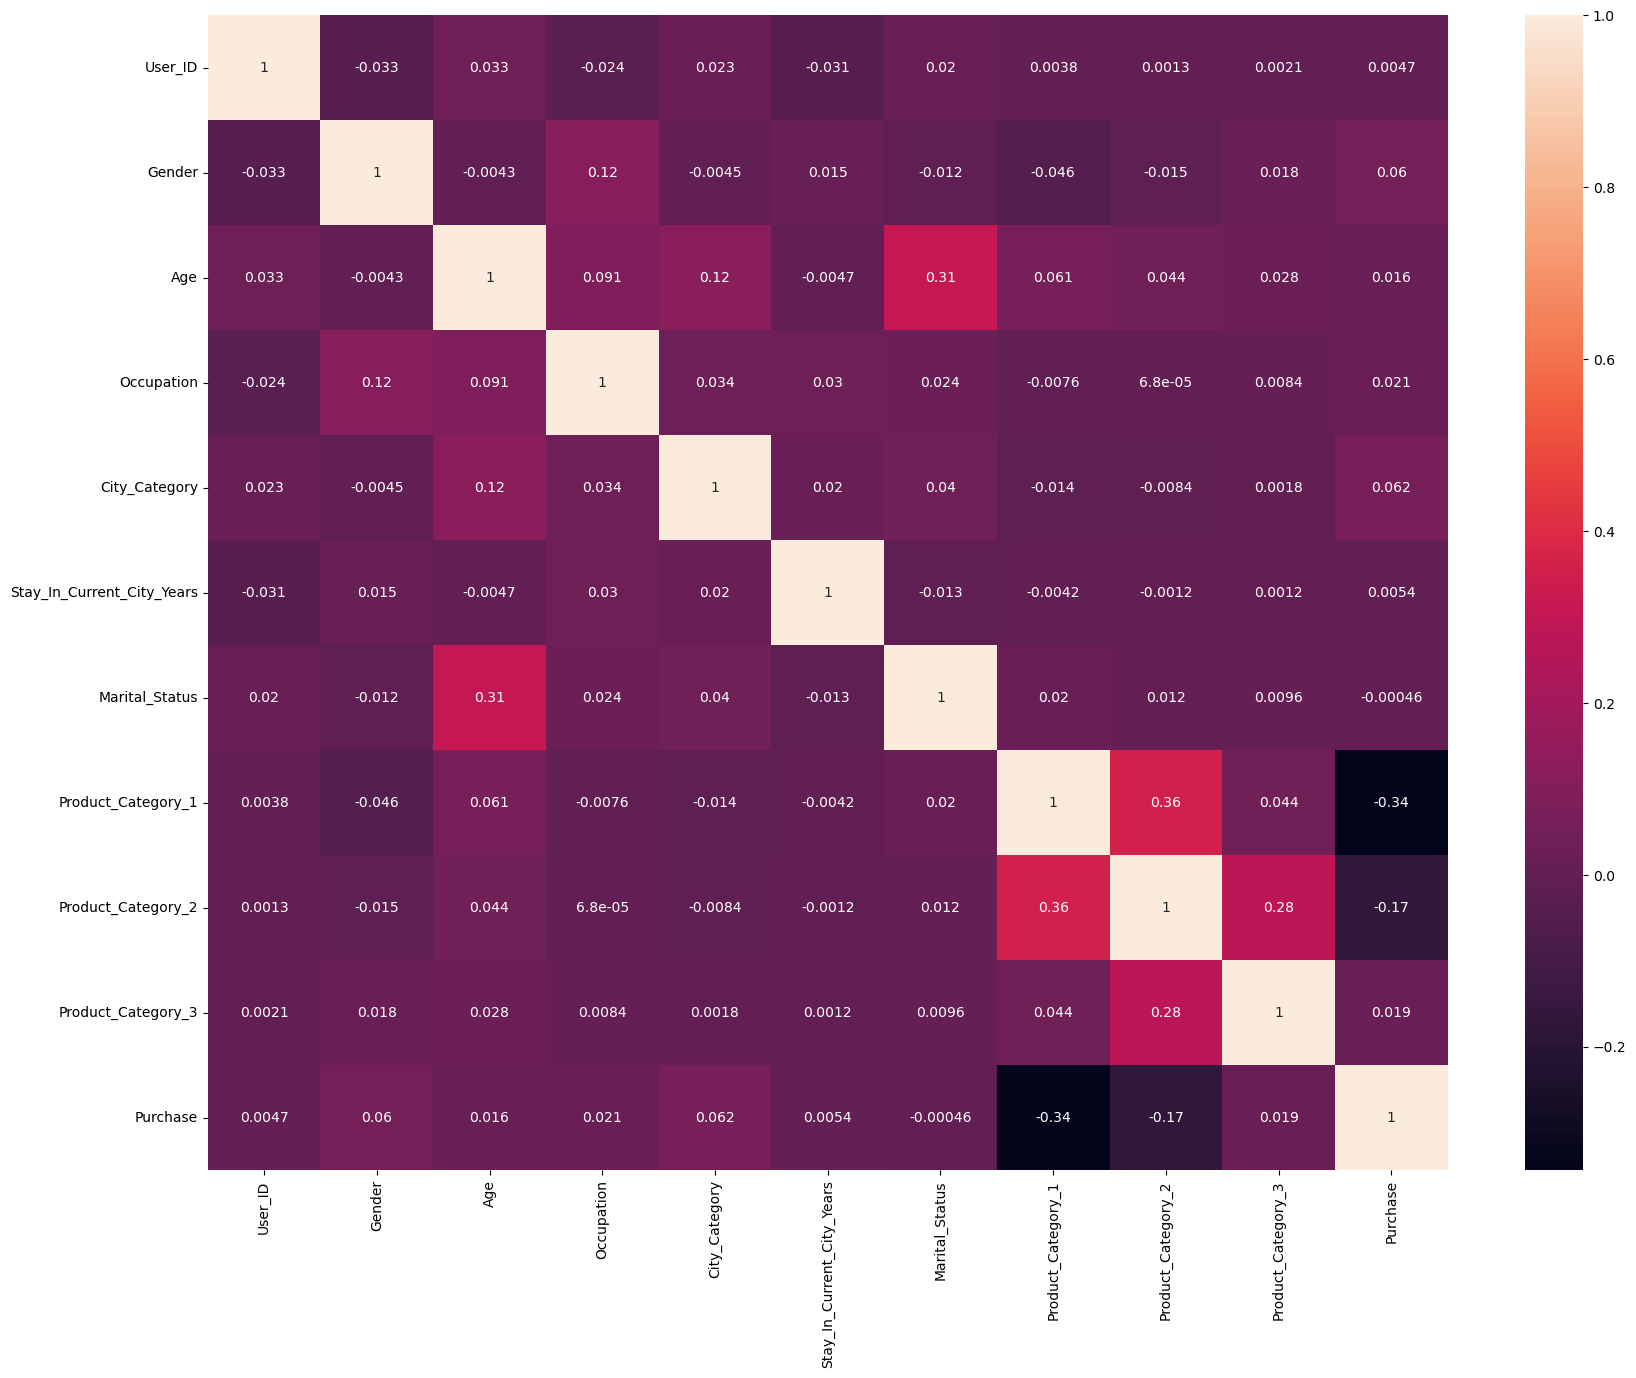

In [19]:
print(df.corr())
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

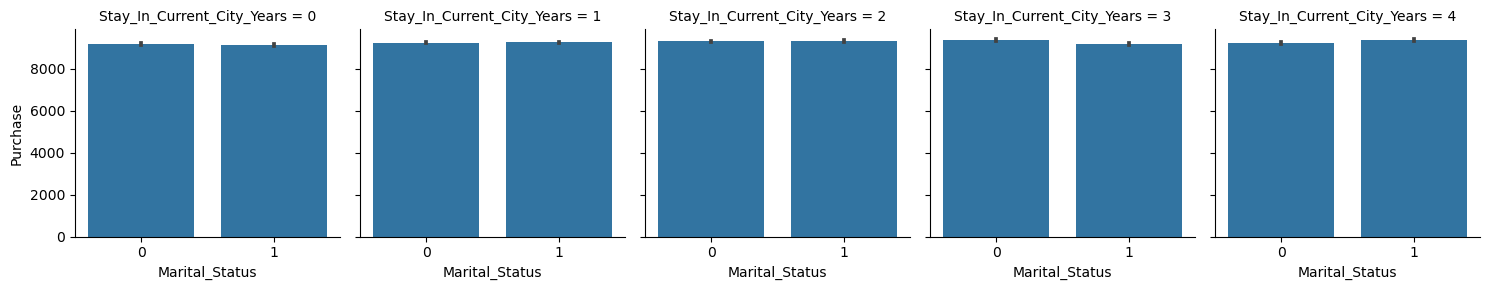

In [20]:
g = sns.FacetGrid(df,col="Stay_In_Current_City_Years")
g.map(sns.barplot, "Marital_Status", "Purchase");

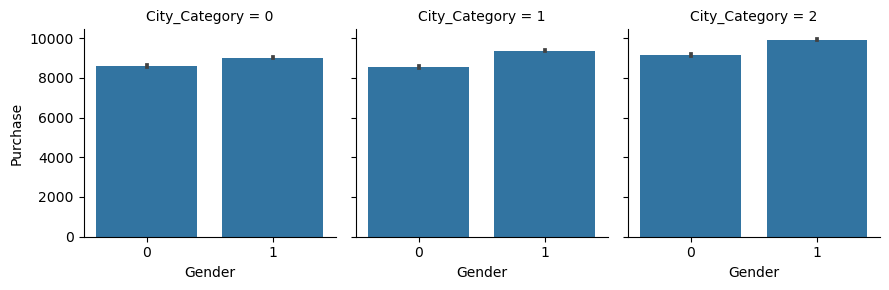

In [21]:
g = sns.FacetGrid(df,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

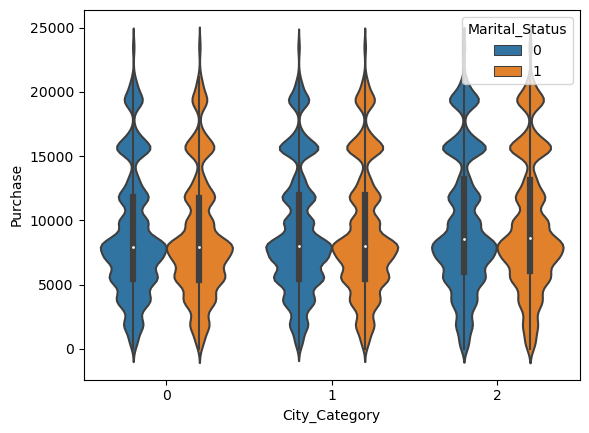

In [22]:
sns.violinplot(x='City_Category',y='Purchase',hue='Marital_Status',
               data=df)

# Feature Engineering

Dropping columns User_ID & Product_ID because they would not affect the target value

In [23]:
df.drop(['User_ID','Product_ID'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      550068 non-null  int32
 1   Age                         550068 non-null  int32
 2   Occupation                  550068 non-null  int64
 3   City_Category               550068 non-null  int32
 4   Stay_In_Current_City_Years  550068 non-null  int32
 5   Marital_Status              550068 non-null  int64
 6   Product_Category_1          550068 non-null  int64
 7   Product_Category_2          550068 non-null  int64
 8   Product_Category_3          550068 non-null  int64
 9   Purchase                    550068 non-null  int64
dtypes: int32(4), int64(6)
memory usage: 33.6 MB


# Model Training

Random Forest Regressor

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [25]:
# split into inputs and outputs
X, y = df.iloc[:, :9], df.iloc[:, 9]
print(X.shape, y.shape)

(550068, 9) (550068,)


In [26]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(368545, 9) (181523, 9) (368545,) (181523,)


In [27]:
# Feature Scaling of training and test set
from sklearn.preprocessing import StandardScaler
sc_X_train = StandardScaler()
X_train = sc_X_train.fit_transform(X_train)

sc_X_test = StandardScaler()
X_test = sc_X_test.fit_transform(X_test)

In [28]:
# compare MAE with differing values of max_leaf_nodes
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    return(mae)

In [29]:
for max_leaf_nodes in [5, 50, 100, 300, 500, 700, 800, 850]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
    

Max leaf nodes: 5  		 Mean Absolute Error:  2825
Max leaf nodes: 50  		 Mean Absolute Error:  2242
Max leaf nodes: 100  		 Mean Absolute Error:  2217
Max leaf nodes: 300  		 Mean Absolute Error:  2196
Max leaf nodes: 500  		 Mean Absolute Error:  2191
Max leaf nodes: 700  		 Mean Absolute Error:  2187
Max leaf nodes: 800  		 Mean Absolute Error:  2185
Max leaf nodes: 850  		 Mean Absolute Error:  2185


In [30]:
# fit the model
from sklearn.metrics import mean_squared_error
model = RandomForestRegressor(n_estimators=300,random_state=1)
model.fit(X_train, y_train)
# make predictions
yhat = model.predict(X_test)
# evaluate predictions
mse = mean_squared_error(y_test, yhat)
print('MSE: ' ,mse)
print('RMSE: ' ,mse**0.5)

MSE:  9335818.433355946
RMSE:  3055.4571561970797


XGB Algorithm Implementation